In [1]:
# Python script for solving differential equation using Forward Euler

In [5]:
# Import necessary libraries and dependencies
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
# This class takes in paramters for a first order differential equation and attempts to solve it numerically utilising the forward euler methodology
class Model:
    # Here the arguments are checked and assigned in the class
    def __init__(self,T0,Tstop,Y0,h):
        
        assert isinstance(T0,(int,float)),'Not a number! Please input a number for the arguments'
        assert isinstance(Tstop,(int,float)),'Not a number! Please input a number for the arguments'
        assert isinstance(Y0,(int,float)),'Not a number! Please input a number for the arguments'
        assert isinstance(h,(int,float)),'Not a number! Please input a number for the arguments'
        assert T0 <= Tstop, 'Tstop must be larger than T0'
        
        self.T0 = T0
        self.Tstop = Tstop
        self.Y0 = Y0
        self.h = h
        
    def forward_euler(self): # solve y' = f(y,t) from T0 to Tstop with step-size h
        
        def f(y,t):  # Here this function describes the first order differential equation to be solved numerically
            return -2*t*y
        
        # Initialise variables 
        n = int((self.Tstop - self.T0)/self.h) # number of steps
        t = np.zeros(n+1)
        y = np.zeros(n+1)
        t[0] = self.T0
        y[0] = self.Y0
    
        # Computation using forward euler method employed in for loop
        for k in range(n):
            t[k+1] = t[k] + self.h
            y[k+1] = y[k] + self.h*f(y[k],t[k])
        return y,t

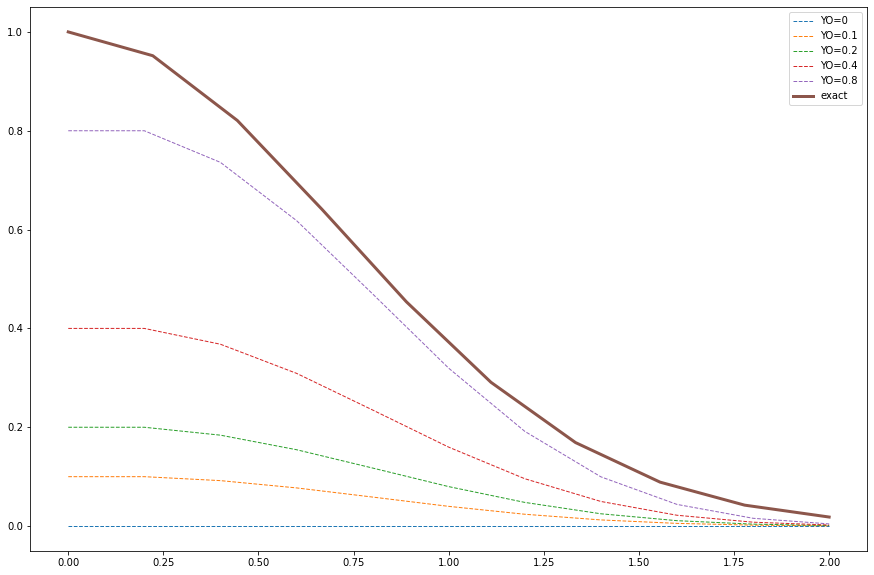

In [10]:
#plot showing accuracy of forward euler 

plt.figure(figsize=(15,10))


for Y0 in [0,0.1,0.2,0.4,0.8]:
    g = Model(T0=0,Tstop=2,Y0=Y0,h=0.2)
    y,t = g.forward_euler()
    plt.plot(t,y,label=f'YO={Y0}',linestyle='dashed',linewidth=1)
    plt.legend()
t_fine = np.linspace(0,2,10)
plt.plot(t_fine,np.exp(-t_fine**2),label = 'exact',linewidth=3)
plt.legend()
plt.show()

In [11]:
# the object g is the instance of the class model with given paramaters for example being 
g = Model(T0=0,Tstop=1,Y0=1,h=0.1)

#unpack and assign y and t co-ordinates 
y,t = g.forward_euler()

# print y array
print(y)

[1.         1.         0.98       0.9408     0.884352   0.81360384
 0.73224346 0.64437424 0.55416185 0.46549595 0.38170668]
